<a href="https://colab.research.google.com/github/viniciusendo/dnc_case_varejo_ao_vivo/blob/main/DNC_CASE_Encontro_ao_Vivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Contexto**
Somos uma empresa de varejo on-line que vende produtos eletrônicos de alta qualidade. Como parte do nosso compromisso em fornecer um excelente atendimento ao cliente, monitoramos regularmente nossas chamadas e entregas para garantir que nossos clientes estejam satisfeitos com seus produtos e experiência de compra.

Precisamos analisar as seguintes métricas:

1.   Custos das ligações feitas
2.   Custo dos produtos (histograma)
3.   Comportamento do custo do produto pela data de entrega
4.   Desconto por preço do produto
5.   Correlações entre variáveis

# **Data Understanding/Data Preparation**

In [ ]:
# Import das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Criação do dataframe
df = pd.read_csv("Train.csv", sep=';')

In [ ]:
# Visualização prévia dos dados
df.head()

,ID,data_envio,data_chegada,tempo_entrega,tamanho_armazem,modo_transporte,ligacoes_feitas,ranking_cliente,custo_produto,compra_previa,importancia_do_produto,genero,desconto,peso_em_gramas,atrasou
0,1,03/05/2022,20/06/2022,48,D,Flight,4.0,2,177,3,low,F,44.0,1233,1
1,2,27/05/2022,25/06/2022,29,F,Flight,4.0,5,216,2,low,M,59.0,3088,1
2,3,16/05/2022,21/06/2022,36,A,Flight,2.0,2,183,4,low,M,48.0,3374,1
3,4,06/05/2022,04/06/2022,29,B,Flight,3.0,3,176,4,medium,M,10.0,1177,1
4,5,05/05/2022,25/06/2022,51,C,Flight,2.0,2,184,3,medium,F,46.0,2484,1


In [ ]:
# Visualização geral dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      10999 non-null  int64  
 1   data_envio              10999 non-null  object 
 2   data_chegada            10999 non-null  object 
 3   tempo_entrega           10999 non-null  int64  
 4   tamanho_armazem         10999 non-null  object 
 5   modo_transporte         10999 non-null  object 
 6   ligacoes_feitas         10936 non-null  float64
 7   ranking_cliente         10999 non-null  int64  
 8   custo_produto           10999 non-null  int64  
 9   compra_previa           10999 non-null  int64  
 10  importancia_do_produto  10999 non-null  object 
 11  genero                  10999 non-null  object 
 12  desconto                10916 non-null  float64
 13  peso_em_gramas          10999 non-null  int64  
 14  atrasou                 10999 non-null

Observamos a existência de valores nulos nas colunas ligacoes_feitas e desconto. Para tratá-los, vamos remover as linhas com nulos.

In [ ]:
# Tratamento dos nulos
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10853 entries, 0 to 10998
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      10853 non-null  int64  
 1   data_envio              10853 non-null  object 
 2   data_chegada            10853 non-null  object 
 3   tempo_entrega           10853 non-null  int64  
 4   tamanho_armazem         10853 non-null  object 
 5   modo_transporte         10853 non-null  object 
 6   ligacoes_feitas         10853 non-null  float64
 7   ranking_cliente         10853 non-null  int64  
 8   custo_produto           10853 non-null  int64  
 9   compra_previa           10853 non-null  int64  
 10  importancia_do_produto  10853 non-null  object 
 11  genero                  10853 non-null  object 
 12  desconto                10853 non-null  float64
 13  peso_em_gramas          10853 non-null  int64  
 14  atrasou                 10853 non-null

In [ ]:
# Correção dos tipos de variáveis
df['data_envio'] = pd.to_datetime(df['data_envio'])
df['data_chegada'] = pd.to_datetime(df['data_chegada'])
df = df.astype({'ligacoes_feitas':'int'})

<ipython-input-7-cb1a0667ea6a>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['data_envio'] = pd.to_datetime(df['data_envio'])
<ipython-input-7-cb1a0667ea6a>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['data_chegada'] = pd.to_datetime(df['data_chegada'])


In [ ]:
# data_envio
print(min(df['data_envio']))
print(max(df['data_envio']))

2022-01-05 00:00:00
2022-12-05 00:00:00


Os dados são relativos aos pedidos enviados no mês de maio de 2022.

In [ ]:
# tempo_entrega
df['tempo_entrega'].describe()

count    10853.000000
mean        30.268958
std         12.501854
min          1.000000
25%         21.000000
50%         30.000000
75%         39.000000
max         60.000000
Name: tempo_entrega, dtype: float64

O tempo de entrega médio é de 30 dias.

A maior parte das entregas (percentil 50) é feita em até 30 dias.

In [ ]:
# tamanho_armazem
df['tamanho_armazem'].value_counts()

F    3618
D    1809
B    1809
C    1809
A    1808
Name: tamanho_armazem, dtype: int64

F é a categoria mais comum, sendo aproximadamente 2 vezes maior que as demais.

In [ ]:
# modo_transporte
df['modo_transporte'].value_counts()

Ship      7376
Flight    1755
Road      1722
Name: modo_transporte, dtype: int64

O modo de transporte mais comum é Ship (67,8%).

In [ ]:
# ligacoes_feitas
df['ligacoes_feitas'].describe()

count    10853.000000
mean         4.057864
std          1.141874
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: ligacoes_feitas, dtype: float64

O número médio de ligações feitas é 4.

In [ ]:
df['ligacoes_feitas'].value_counts()

4    3510
3    3165
5    2302
6    1007
2     626
7     243
Name: ligacoes_feitas, dtype: int64

O número de ligações se concentra principalmente entre 3 e 5.

In [ ]:
df['ligacoes_feitas'].sum()

44040

Foram feitas no total 44345 ligações.

In [ ]:
# ranking_clientes
df['ranking_cliente'].value_counts()

3    2209
1    2204
4    2155
2    2145
5    2140
Name: ranking_cliente, dtype: int64

A distribuição dos clientes é praticamente idêntica entre os rankings.

In [ ]:
# custo_produto
df['custo_produto'].describe()

count    10853.000000
mean       210.405971
std         48.031072
min         96.000000
25%        170.000000
50%        215.000000
75%        251.000000
max        310.000000
Name: custo_produto, dtype: float64

A média de valor dos produtos enviados é de 210.

In [ ]:
# compra_previa
df['compra_previa'].value_counts()

3     3887
2     2558
4     2135
5     1280
6      558
10     178
7      133
8      124
Name: compra_previa, dtype: int64

A maior parte de "venda_previa" concentra-se entre 2 e 5.

In [ ]:
# importancia_produto
df['importancia_do_produto'].value_counts()

low       5224
medium    4694
high       935
Name: importancia_do_produto, dtype: int64

A maior parte dos produtos é de baixa ou média importância.

In [ ]:
# genero
df['genero'].value_counts()

F    5475
M    5378
Name: genero, dtype: int64

A distribuição é praticamente igual entre os gêneros.

In [ ]:
# desconto
df['desconto'].describe()

count    10853.000000
mean        13.148162
std         16.057581
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         65.000000
Name: desconto, dtype: float64

O valor médio de desconto é 13.

In [ ]:
# peso_em_grama
df['peso_em_gramas'].describe()

count    10853.000000
mean      3652.515986
std       1635.087038
min       1001.000000
25%       1846.000000
50%       4174.000000
75%       5064.000000
max       7846.000000
Name: peso_em_gramas, dtype: float64

A média do peso é de 3634g.

In [ ]:
# atraso
df['atrasou'].value_counts()

1    6417
0    4436
Name: atrasou, dtype: int64

A maior parte dos envios atrasou (60%).

# **Métricas**

## 1.   Custos das ligações feitas


In [ ]:
agg_custo_ligacoes = df.groupby('ligacoes_feitas').agg(custo_media = ('custo_produto','mean'),custo_total = ('custo_produto','sum')).reset_index()
agg_custo_ligacoes['percentual'] = round((agg_custo_ligacoes['custo_total']/agg_custo_ligacoes['custo_total'].sum())*100,2)
agg_custo_ligacoes

,ligacoes_feitas,custo_media,custo_total,percentual
0,2,190.172524,119048,5.21
1,3,198.967457,629732,27.58
2,4,206.403989,724478,31.73
3,5,214.648566,494121,21.64
4,6,246.831182,248559,10.88
5,7,278.181070,67598,2.96


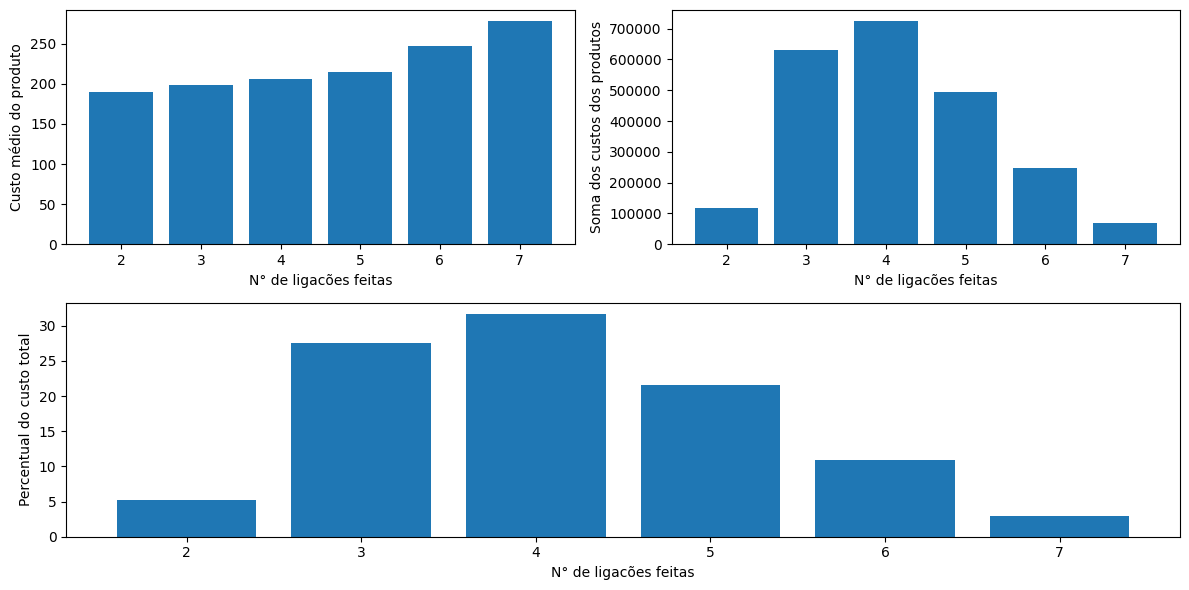

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.bar(agg_custo_ligacoes['ligacoes_feitas'], agg_custo_ligacoes['custo_media'])
plt.xlabel("N° de ligacões feitas")
plt.ylabel("Custo médio do produto")
plt.subplot(222)
plt.bar(agg_custo_ligacoes['ligacoes_feitas'], agg_custo_ligacoes['custo_total'])
plt.xlabel("N° de ligacões feitas")
plt.ylabel("Soma dos custos dos produtos")
plt.subplot(212)
plt.bar(agg_custo_ligacoes['ligacoes_feitas'], agg_custo_ligacoes['percentual'])
plt.ylabel("Percentual do custo total")
plt.xlabel("N° de ligacões feitas")
plt.tight_layout()
plt.show()

Observamos que a medida que o número de ligação aumenta, o custo médio do produto também aumenta. Observamos que em termos de soma total e percentual dos custos, a maior parte dos valores concentra-se entre 3 e 5 ligações. Isso era esperado, uma vez que este é o intervalo que contém o maior número de ligações.

## 2.   Custo dos produtos (histograma)

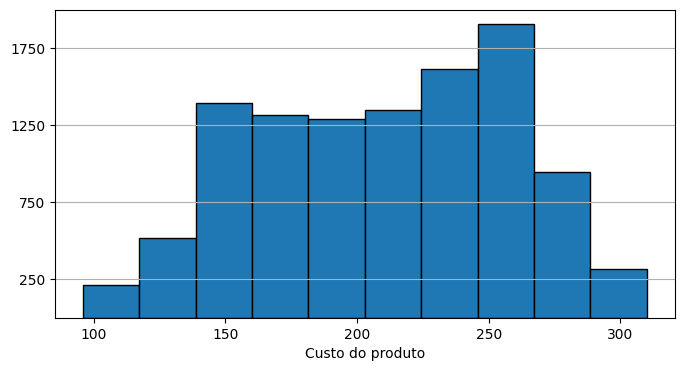

In [ ]:
fig = plt.figure(figsize=(8, 4))
plt.hist(df['custo_produto'],edgecolor='black',bins=10)
plt.xticks([100, 150, 200, 250, 300])
plt.yticks([250, 750, 1250, 1750])
plt.grid(visible=True, axis='y')
plt.xlabel("Custo do produto")
plt.ylabel("")
plt.show()

## 3.   Comportamento do custo do produto pela data de entrega

In [ ]:
agg_data_custo = df.groupby(['data_chegada'])['custo_produto'].agg('mean').reset_index()
agg_data_custo

,data_chegada,custo_produto
0,2022-01-06,208.608808
1,2022-02-06,208.568513
2,2022-03-06,211.212766
3,2022-04-06,210.160105
4,2022-05-06,210.798913
5,2022-06-06,208.237569
6,2022-06-13,210.860406
7,2022-06-14,207.736994
8,2022-06-15,208.732938
9,2022-06-16,208.119241


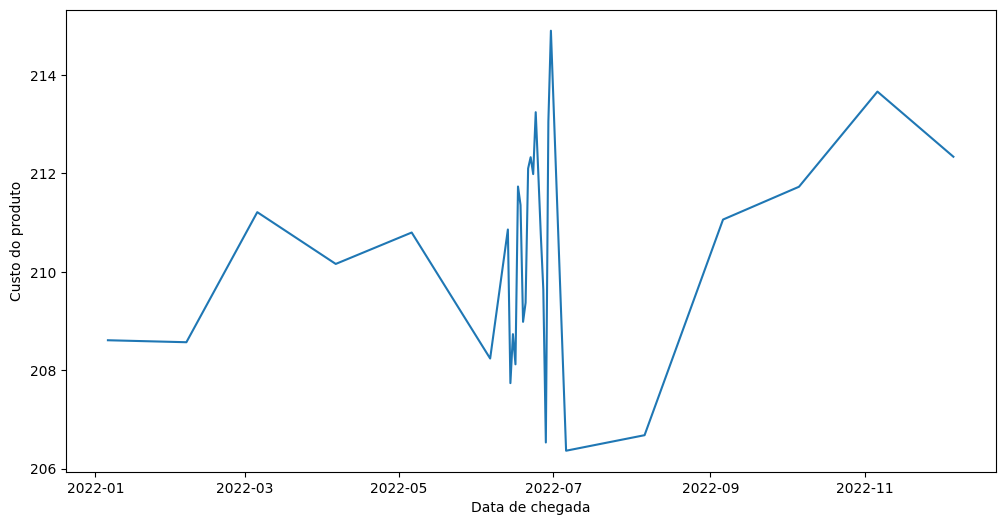

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(agg_data_custo['data_chegada'],agg_data_custo['custo_produto'])
plt.xlabel("Data de chegada")
plt.ylabel("Custo do produto")
plt.show()

O custo do produto não apresenta grandes variações em relação à data de entrega. Pela escala do gráfico, observamos que esta variação não é maior que 5%.

## 4.   Desconto por preço do produto

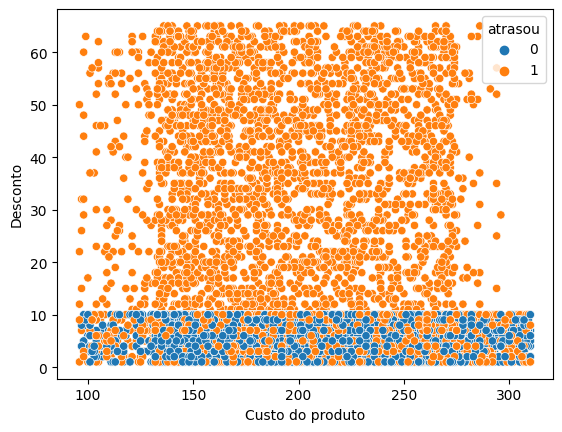

In [ ]:
sns.scatterplot(data=df,x='custo_produto',y='desconto', hue='atrasou').set(xlabel='Custo do produto', ylabel='Desconto')
plt.show()

Observamos que, para produtos entregues sem atraso o desconto máximo foi de 10. Já para produtos entregues com atraso, o desconto variou entre 0 e 65.

## 5.   Correlações entre variáveis

In [ ]:
# Criação de um novo dataframe somente com as variáves numéricas
df_num = df[['tempo_entrega','ligacoes_feitas','ranking_cliente','custo_produto','compra_previa','desconto','atrasou']]
df_corr = df_num.corr()

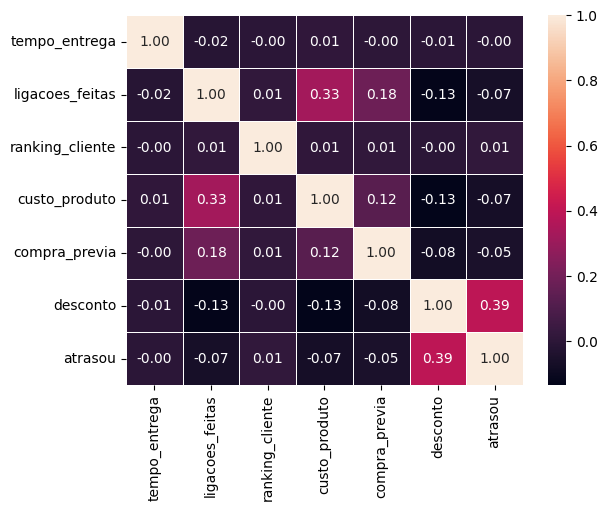

In [ ]:
sns.heatmap(df_corr,annot=True,fmt=".2f",linewidth=.5)
plt.show()

Observamos que as correlações mais relevantes são:


*   Correlação positiva entre desconto e atraso na entrega
*   Correlação positiva entre número de ligações feitas e custo do produto


